In [3]:
import cx_Oracle
conn = cx_Oracle.connect('python/1234@localhost:1521/xe')
        # 서버에 접속       아이디/비번@호스트:포트/데이터베이스
                                            #포트 > 0~6xxxx (1포트 1서비스)
cursor = conn.cursor()

sql = 'delete from product'     #create, read, update, delete
cursor.execute(sql)

items = [
(1,'레몬',1500,\
'레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.','lemon.jpg'),
(2,'오렌지',2000,\
'비타민 C가 풍부합니다. 생과일 주스로 마시면 좋습니다.','orange.jpg'),
(3,'키위',3000,\
'비타민 C가 매우 풍부합니다. 다이어트나 미용에 좋습니다.','kiwi.jpg'),
(4,'포도',5000,'폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.','grape.jpg'),
(5,'딸기',8000,\
'비타민 C나 플라보노이드를 다량 함유하고 있습니다.','strawberry.jpg'),  
(6,'귤',7000,\
'시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.','tangerine.jpg')  
]

for row in items:
    sql = 'insert into product values (:1,:2,:3,:4,:5)'
    cursor.execute(sql, row)

sql = 'select count(*) from product'
cursor.execute(sql)
count = cursor.fetchone()
print('상품개수:',count[0])

상품개수: 6


In [4]:
# 전체 레코드 조회
sql = "select * from product"
cursor.execute(sql)

for row in cursor:
    # CLOB 필드를 읽는 방법
    description=row[3].read()
    print(row)
    print(description)

(1, '레몬', 1500, <cx_Oracle.LOB object at 0x0000015D65E57870>, 'lemon.jpg')
레몬에 포함된 구연산은 피로회복에 좋습니다. 비타민 C도 풍부합니다.
(2, '오렌지', 2000, <cx_Oracle.LOB object at 0x0000015D65E4A9F0>, 'orange.jpg')
비타민 C가 풍부합니다. 생과일 주스로 마시면 좋습니다.
(3, '키위', 3000, <cx_Oracle.LOB object at 0x0000015D65E57CC0>, 'kiwi.jpg')
비타민 C가 매우 풍부합니다. 다이어트나 미용에 좋습니다.
(4, '포도', 5000, <cx_Oracle.LOB object at 0x0000015D65E57870>, 'grape.jpg')
폴리페놀을 다량 함유하고 있어 항산화 작용을 합니다.
(5, '딸기', 8000, <cx_Oracle.LOB object at 0x0000015D65E57CC0>, 'strawberry.jpg')
비타민 C나 플라보노이드를 다량 함유하고 있습니다.
(6, '귤', 7000, <cx_Oracle.LOB object at 0x0000015D65E57870>, 'tangerine.jpg')
시네피린을 함유하고 있어 감기 예방에 좋다고 합니다.


In [5]:
#일부 레코드 삭제
sql = "delete from product where product_id=6"
cursor.execute(sql)
#모든 레코드 삭제
sql = "delete from product"
cursor.execute(sql)

In [6]:
#모든 레코드를 한꺼번에 insert
sql="insert into product values (:1,:2,:3,:4,:5)"
cursor.executemany(sql, items)

#모든 레코드를 한꺼번에 조회하여 리스트로 저장
sql = "select * from product"
cursor.execute(sql)
rs=cursor.fetchall()
print("\n레코드셋:",rs)
for row in rs:
    print(row)

conn.commit()
cursor.close()
conn.close()


레코드셋: [(1, '레몬', 1500, <cx_Oracle.LOB object at 0x0000015D65E578D0>, 'lemon.jpg'), (2, '오렌지', 2000, <cx_Oracle.LOB object at 0x0000015D65E57840>, 'orange.jpg'), (3, '키위', 3000, <cx_Oracle.LOB object at 0x0000015D65F41D50>, 'kiwi.jpg'), (4, '포도', 5000, <cx_Oracle.LOB object at 0x0000015D65F41A50>, 'grape.jpg'), (5, '딸기', 8000, <cx_Oracle.LOB object at 0x0000015D65F414E0>, 'strawberry.jpg'), (6, '귤', 7000, <cx_Oracle.LOB object at 0x0000015D65F41F00>, 'tangerine.jpg')]
(1, '레몬', 1500, <cx_Oracle.LOB object at 0x0000015D65E578D0>, 'lemon.jpg')
(2, '오렌지', 2000, <cx_Oracle.LOB object at 0x0000015D65E57840>, 'orange.jpg')
(3, '키위', 3000, <cx_Oracle.LOB object at 0x0000015D65F41D50>, 'kiwi.jpg')
(4, '포도', 5000, <cx_Oracle.LOB object at 0x0000015D65F41A50>, 'grape.jpg')
(5, '딸기', 8000, <cx_Oracle.LOB object at 0x0000015D65F414E0>, 'strawberry.jpg')
(6, '귤', 7000, <cx_Oracle.LOB object at 0x0000015D65F41F00>, 'tangerine.jpg')


### 학생 데이터

In [7]:
import cx_Oracle
conn=cx_Oracle.connect('python/1234@localhost:1521/xe')
cursor=conn.cursor()

sql='''
select s.majorno,mname,count(*)
from stud s, major m
where s.majorno=m.majorno
group by s.majorno,mname
order by s.majorno
''' 
cursor.execute(sql)
rows=cursor.fetchall()
for row in rows:
    print(row)
    
cursor.close()
conn.close()

(101, '컴퓨터공학', 7)
(102, '데이터사이언스', 4)
(103, '소프트웨어공학', 1)
(201, '전자공학', 4)
(202, '기계공학', 2)
(301, '문헌정보학', 2)


In [8]:
x=list(range(1,7)) #1~6
names=[]
y=[]
for row in rows:
    names.append(row[1])
    y.append(row[2])
    
print(x)
print(names) #학과명
print(y) #학생수

[1, 2, 3, 4, 5, 6]
['컴퓨터공학', '데이터사이언스', '소프트웨어공학', '전자공학', '기계공학', '문헌정보학']
[7, 4, 1, 4, 2, 2]


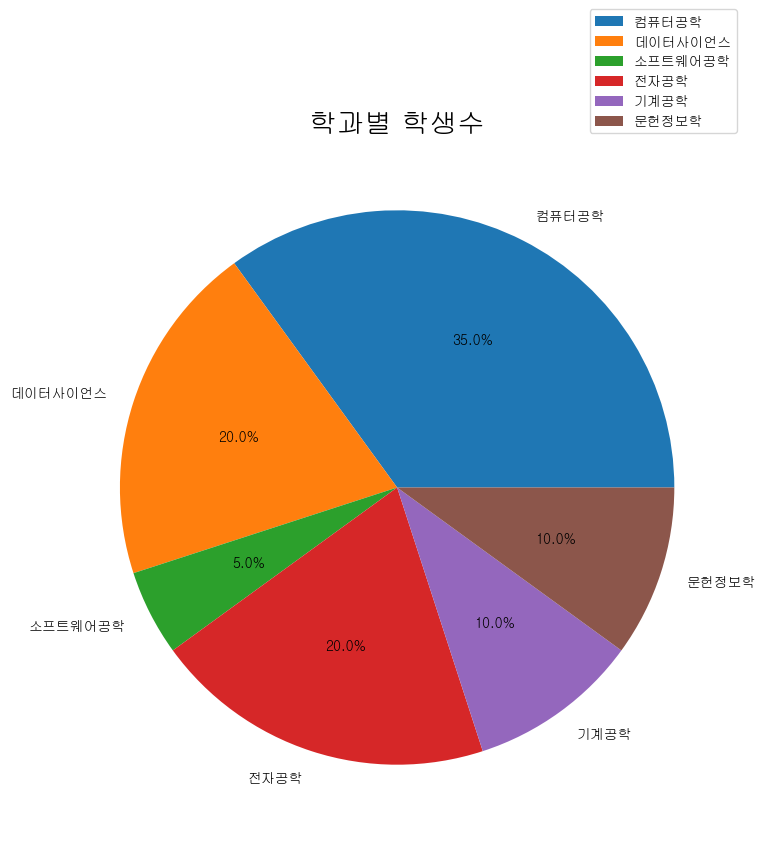

In [25]:
import matplotlib.pyplot as plt
#그래프 출력 옵션
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(16,9)
plt.title('학과별 학생수',fontsize=20) #제목
plt.pie(y,labels=names,autopct='%.1f%%') #파이 차트
#plt.legend(names,loc='upper right') #범례
#bbox_to_anchor: figure의 width,height를 1.0을 기준으로 설정
#legend의 좌측상단좌표를 figure의 1.0, 1.2에 위치시킴
#figure의 바깥쪽에 legend가 표시됨
plt.legend(names,bbox_to_anchor=[1, 1.2]) #범례
plt.show()